C:\Users\91020\AppData\Local\Temp\ipykernel_33316\2849250498.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50725 (\N{HANGUL SYLLABLE OG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing

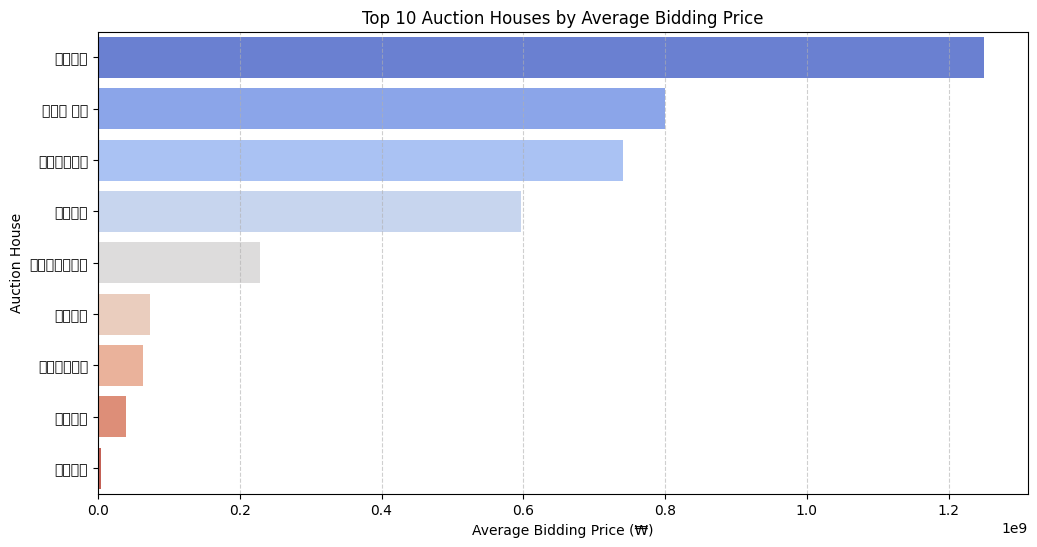

c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\anaconda_1\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\src\

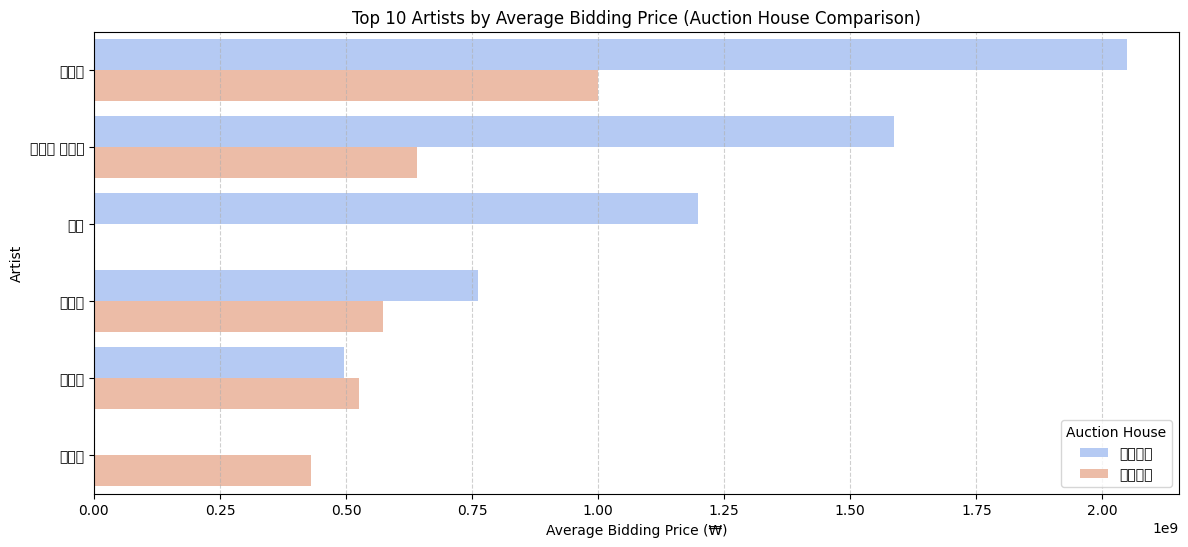

In [2]:
#지피티 활용
#유명 경매사별 데이터

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 데이터 불러오기
file_path = "C:\src\data_python\\2017-2021 korea art auction.xlsx"
df = pd.read_excel(file_path, sheet_name="시트1")

# 🔹 데이터 전처리 (숫자형 변환)
df['Bidding'] = pd.to_numeric(df['Bidding'], errors='coerce')

# 🔹 1. 경매사별 평균 낙찰가 (Auction House Comparison)
auction_price_summary = df.groupby("Company")['Bidding'].mean().reset_index()
auction_price_summary['Transaction Count'] = df.groupby("Company")['Bidding'].count().values
auction_price_summary = auction_price_summary.sort_values(by="Bidding", ascending=False)

# 🔹 그래프 1: 경매사별 평균 낙찰가 (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=auction_price_summary.head(10), 
    x="Bidding", 
    y="Company", 
    palette="coolwarm", 
    order=auction_price_summary.head(10)['Company']
)

plt.xlabel("Average Bidding Price (₩)")
plt.ylabel("Auction House")
plt.title("Top 10 Auction Houses by Average Bidding Price")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# 🔹 2. 작가별 평균 낙찰가 (Artist & Auction House)
artist_price_summary = df.groupby(["Artist", "Company"])['Bidding'].mean().reset_index()
artist_price_summary['Transaction Count'] = df.groupby(["Artist", "Company"])['Bidding'].count().values
artist_price_filtered = artist_price_summary[artist_price_summary["Transaction Count"] >= 10]

# 🔹 그래프 2: 작가별 경매사별 평균 낙찰가 (Top 10 Artists)
plt.figure(figsize=(14, 6))
sns.barplot(
    data=artist_price_filtered.sort_values(by="Bidding", ascending=False).head(10),
    x="Bidding",
    y="Artist",
    hue="Company",
    palette="coolwarm"
)

plt.xlabel("Average Bidding Price (₩)")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Average Bidding Price (Auction House Comparison)")
plt.legend(title="Auction House")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [3]:
import matplotlib.font_manager as fm

# 🔹 시스템에 설치된 모든 폰트 확인
font_list = [f.name for f in fm.fontManager.ttflist]

# 🔹 "NanumGothic"이 있는지 확인
if "NanumGothic" in font_list:
    print("✅ 'NanumGothic' 폰트가 설치되어 있습니다!")
else:
    print("❌ 'NanumGothic' 폰트가 설치되지 않았습니다.")
    
# 🔹 설치된 한글 폰트 목록 출력 (한글 포함된 폰트만 필터링)
korean_fonts = [font for font in font_list if any(c in font for c in "가나다라마바사아자차카타파하")]
print("📌 설치된 한글 폰트 목록:", korean_fonts)

✅ 'NanumGothic' 폰트가 설치되어 있습니다!
📌 설치된 한글 폰트 목록: []


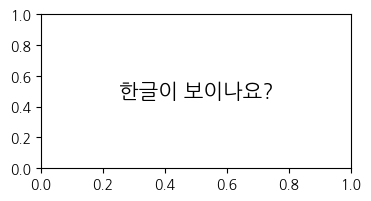

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'  # 한글 폰트 강제 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 🔹 한글 테스트
plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, "한글이 보이나요?", fontsize=15, ha='center', va='center')
plt.show()

C:\Users\91020\AppData\Local\Temp\ipykernel_33316\3052963034.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


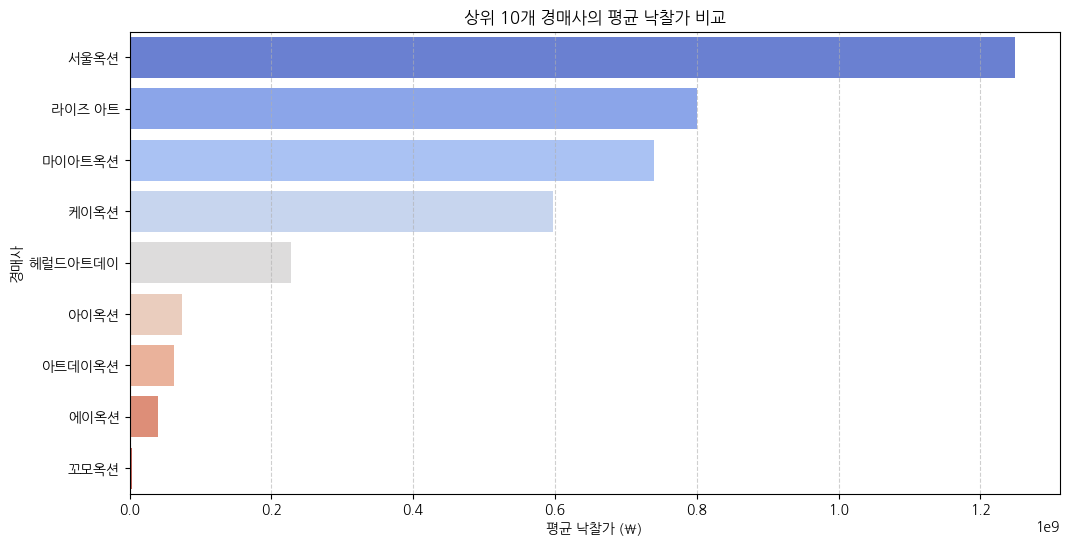

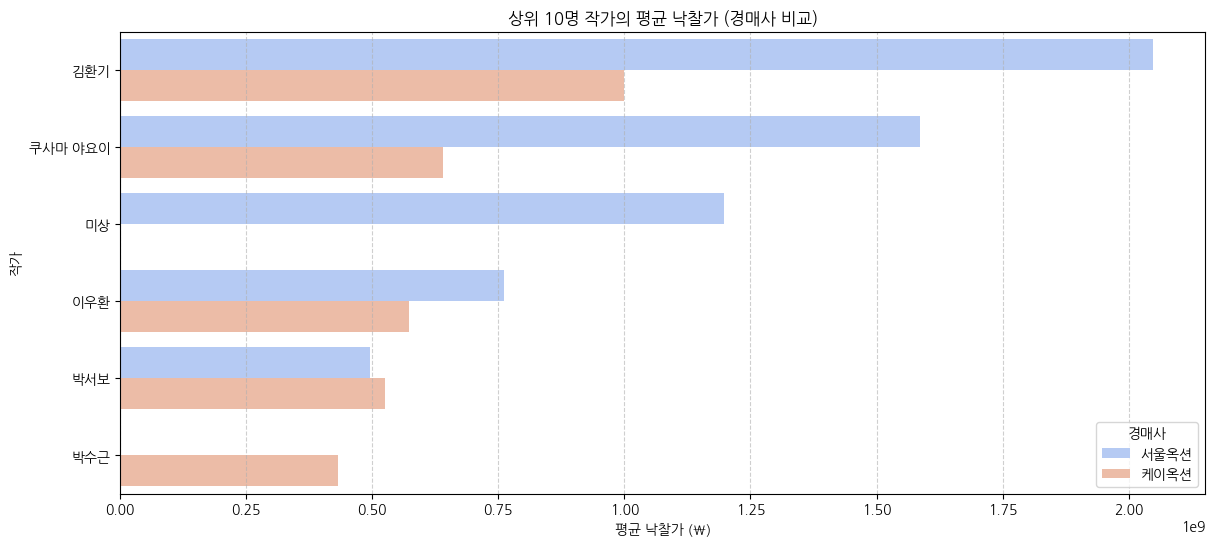

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 한글 폰트 강제 적용
plt.rcParams['font.family'] = 'NanumGothic'  # Windows: 'Malgun Gothic', Mac: 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 🔹 데이터 불러오기
file_path = "C:\src\data_python\\2017-2021 korea art auction.xlsx"
df = pd.read_excel(file_path, sheet_name="시트1")

# 🔹 데이터 전처리 (숫자형 변환)
df['Bidding'] = pd.to_numeric(df['Bidding'], errors='coerce')

# 🔹 1. 경매사별 평균 낙찰가 (Auction House Comparison)
auction_price_summary = df.groupby("Company")['Bidding'].mean().reset_index()
auction_price_summary['Transaction Count'] = df.groupby("Company")['Bidding'].count().values
auction_price_summary = auction_price_summary.sort_values(by="Bidding", ascending=False)

# 🔹 그래프 1: 경매사별 평균 낙찰가 (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=auction_price_summary.head(10), 
    x="Bidding", 
    y="Company", 
    palette="coolwarm", 
    order=auction_price_summary.head(10)['Company']
)

plt.xlabel("평균 낙찰가 (₩)")
plt.ylabel("경매사")
plt.title("상위 10개 경매사의 평균 낙찰가 비교")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# 🔹 2. 작가별 평균 낙찰가 (Artist & Auction House)
artist_price_summary = df.groupby(["Artist", "Company"])['Bidding'].mean().reset_index()
artist_price_summary['Transaction Count'] = df.groupby(["Artist", "Company"])['Bidding'].count().values
artist_price_filtered = artist_price_summary[artist_price_summary["Transaction Count"] >= 10]

# 🔹 그래프 2: 작가별 경매사별 평균 낙찰가 (Top 10 Artists)
plt.figure(figsize=(14, 6))
sns.barplot(
    data=artist_price_filtered.sort_values(by="Bidding", ascending=False).head(10),
    x="Bidding",
    y="Artist",
    hue="Company",
    palette="coolwarm"
)

plt.xlabel("평균 낙찰가 (₩)")
plt.ylabel("작가")
plt.title("상위 10명 작가의 평균 낙찰가 (경매사 비교)")
plt.legend(title="경매사")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
